In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

%matplotlib inline
sns.set()

column_list = ['mpl_hostname','mpl_letter','mst_metratio','mpl_discmethod','mpl_pnum','mpl_orbper','mpl_orbsmax',
               'mpl_orbeccen','mpl_orbincl','mpl_bmassj','mpl_radj','mpl_dens','mpl_eqt','mpl_insol',
               'mst_teff','mst_mass','mst_rad','mst_age','mst_lum','mpl_status']

core_columns = ['mst_teff','mst_mass','mst_rad','mst_age','mst_lum','mpl_orbper','mpl_orbsmax','mpl_bmassj',
                'mpl_radj','mpl_dens','mpl_eqt','mpl_insol']

Read the file containing the last data to be extracted from the archive.

In [2]:
exoplanet_extract = pd.read_pickle('current_exo_ext')

The planets density is a column that is critical in determining the type of planet. So only rows that have a density estimate are used. Initially we only want a smaller number of attributes.

In [3]:
exoplanet_core = exoplanet_extract.loc[exoplanet_extract['mpl_dens'].notnull(),core_columns]

We start by examining the statistics of the data.

In [4]:
exoplanet_core.describe()

,mst_teff,mst_mass,mst_rad,mst_age,mst_lum,mpl_orbper,mpl_orbsmax,mpl_bmassj,mpl_radj,mpl_dens,mpl_eqt,mpl_insol
count,1235.000000,1324.000000,1281.000000,930.000000,368.000000,1375.000000,1195.000000,1358.000000,1377.000000,1390.000000,777.000000,161.000000
mean,5593.142591,1.030934,1.170156,4.619983,-0.078351,12.152802,0.073672,1.266903,0.957259,2.292018,1352.274131,831.966689
std,785.143803,0.267722,0.515946,3.071952,0.787774,39.820036,0.112995,2.303366,0.498843,4.162634,532.758817,3658.804233
min,2559.000000,0.080200,0.040000,0.020000,-3.281000,0.090706,0.004400,0.000210,0.045000,0.010000,199.000000,0.258000
25%,5249.000000,0.890000,0.860000,2.170000,-0.330000,2.519961,0.036085,0.077800,0.435000,0.440000,1001.000000,11.000000
50%,5700.000000,1.030000,1.080000,4.000000,0.045000,3.696122,0.046630,0.660000,1.097000,0.936000,1400.000000,128.300000
75%,6094.000000,1.210000,1.440000,6.700000,0.425750,7.340711,0.062000,1.330750,1.300000,2.395000,1700.000000,634.100000
max,10170.000000,2.520000,6.300000,14.900000,1.724000,1047.835600,2.026000,27.230000,2.090000,77.700000,4050.000000,44900.000000


In [5]:
exoplanet_core.skew()

mst_teff       -0.686168
mst_mass       -0.294057
mst_rad         2.741979
mst_age         0.733917
mst_lum        -1.686532
mpl_orbper     14.999416
mpl_orbsmax     7.564087
mpl_bmassj      5.289728
mpl_radj       -0.405386
mpl_dens        7.507301
mpl_eqt         0.040471
mpl_insol      11.147663
dtype: float64

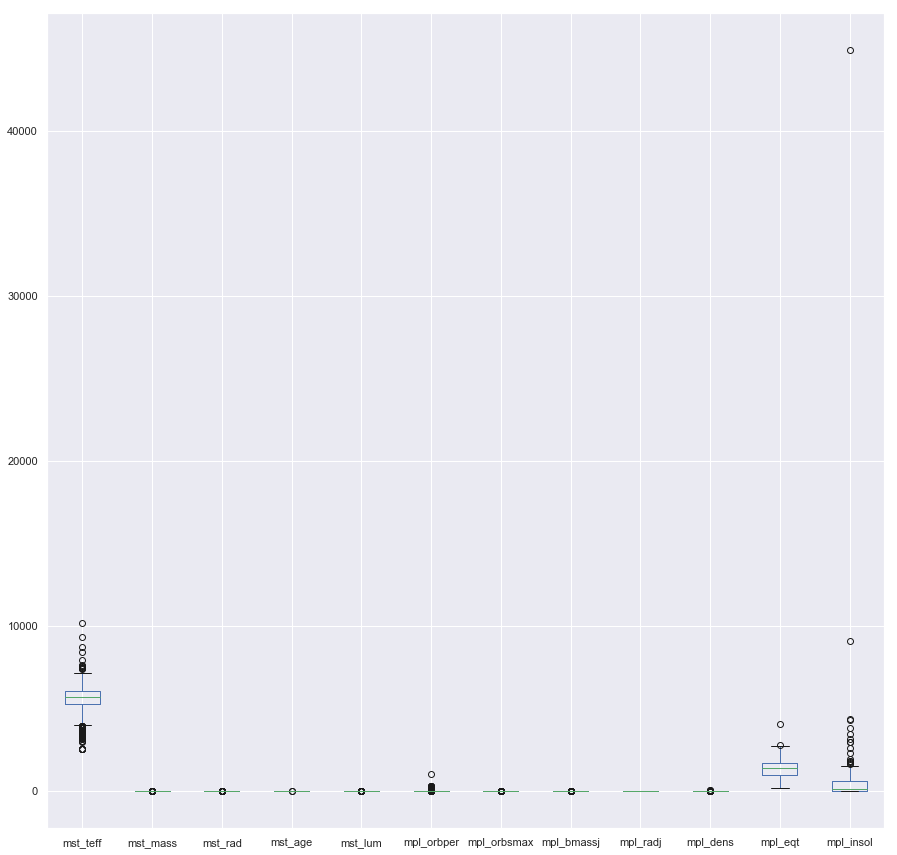

In [6]:
ax = exoplanet_core.boxplot(figsize=(15,15))

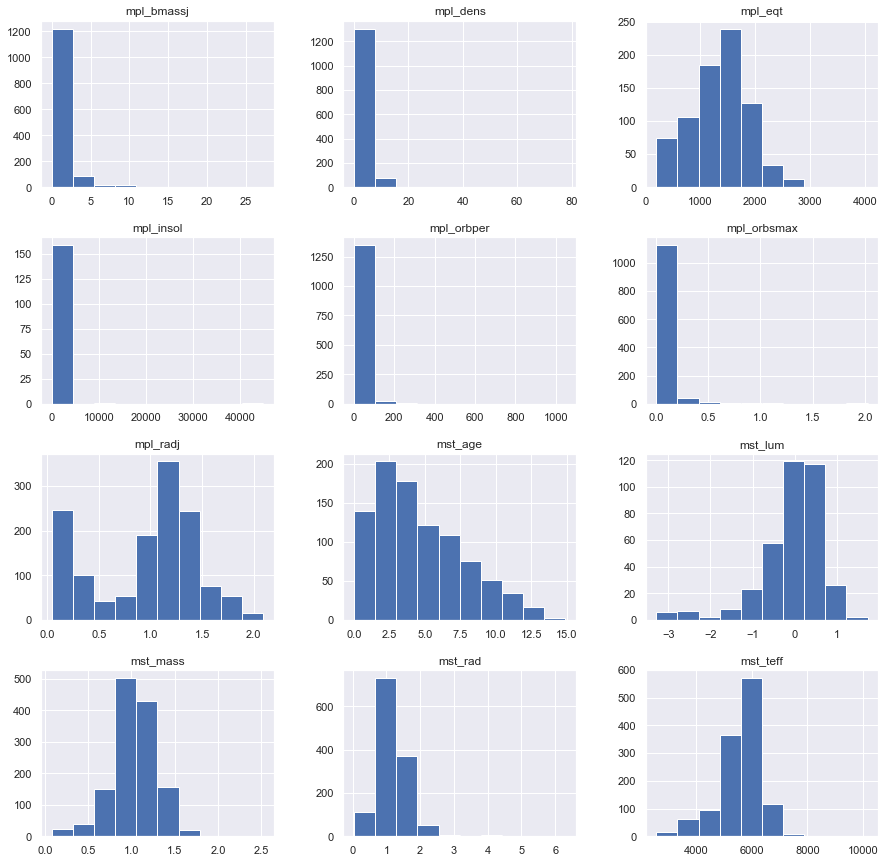

In [7]:
ax = exoplanet_core.hist(figsize=(15,15))

In [8]:
exoplanet_core.corr()

,mst_teff,mst_mass,mst_rad,mst_age,mst_lum,mpl_orbper,mpl_orbsmax,mpl_bmassj,mpl_radj,mpl_dens,mpl_eqt,mpl_insol
mst_teff,1.000000,0.912009,0.572468,-0.310670,0.931978,-0.046614,-0.042926,0.281240,0.580538,-0.132542,0.707069,0.485733
mst_mass,0.912009,1.000000,0.775119,-0.378493,0.949361,-0.066207,-0.064362,0.264518,0.605378,-0.146688,0.728600,0.499193
mst_rad,0.572468,0.775119,1.000000,-0.183716,0.798500,-0.036915,-0.007711,0.156765,0.449874,-0.134290,0.617367,0.344290
mst_age,-0.310670,-0.378493,-0.183716,1.000000,-0.212551,0.021696,0.014298,-0.186598,-0.199164,-0.013024,-0.259441,-0.226087
mst_lum,0.931978,0.949361,0.798500,-0.212551,1.000000,-0.037262,-0.031765,0.269858,0.660283,-0.291302,0.759558,0.334965
mpl_orbper,-0.046614,-0.066207,-0.036915,0.021696,-0.037262,1.000000,0.940512,-0.061139,-0.187004,0.012434,-0.321965,-0.063133
mpl_orbsmax,-0.042926,-0.064362,-0.007711,0.014298,-0.031765,0.940512,1.000000,-0.049705,-0.264512,0.047917,-0.448140,-0.089079
mpl_bmassj,0.281240,0.264518,0.156765,-0.186598,0.269858,-0.061139,-0.049705,1.000000,0.273433,0.350148,0.217669,0.292867
mpl_radj,0.580538,0.605378,0.449874,-0.199164,0.660283,-0.187004,-0.264512,0.273433,1.000000,-0.396162,0.679082,0.348293
mpl_dens,-0.132542,-0.146688,-0.134290,-0.013024,-0.291302,0.012434,0.047917,0.350148,-0.396162,1.000000,-0.221183,-0.083836


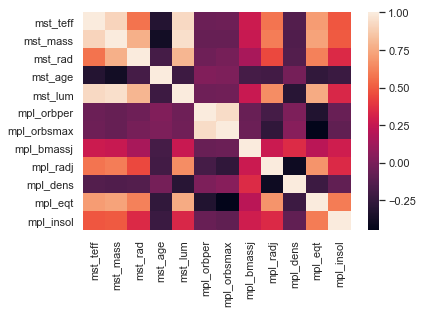

In [9]:
ax = sns.heatmap(exoplanet_core.corr())

The data have skews and values that present challenges to clustering algorithms. This include skew, distribution and large difference in scale. We take the natural logarithm of values to reduce the data back to linear relationships.

In [10]:
exoplanet_core['ln_mst_teff'] = exoplanet_core['mst_teff'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mst_mass'] = exoplanet_core['mst_mass'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mst_rad'] = exoplanet_core['mst_rad'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mpl_orbper'] = exoplanet_core['mpl_orbper'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mpl_eqt'] = exoplanet_core['mpl_eqt'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mpl_orbsmax'] = exoplanet_core['mpl_orbsmax'].map(lambda tmp: math.log(tmp))
# multiply by J mass?
exoplanet_core['ln_mpl_bmassj'] = exoplanet_core['mpl_bmassj'].map(lambda tmp: math.log(tmp))
# multiply by J radius?
exoplanet_core['ln_mpl_radj'] = exoplanet_core['mpl_radj'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mpl_insol'] = exoplanet_core['mpl_insol'].map(lambda tmp: math.log(tmp))
exoplanet_core['ln_mpl_dens'] = exoplanet_core['mpl_dens'].map(lambda tmp: math.log(tmp))
exoplanet_core = exoplanet_core.drop(['mst_teff','mst_mass','mst_rad','mpl_orbper','mpl_orbsmax',
                                      'mpl_bmassj','mpl_radj','mpl_insol','mpl_dens','mpl_eqt'],axis=1)

In [11]:
exoplanet_core.describe()

,mst_age,mst_lum,ln_mst_teff,ln_mst_mass,ln_mst_rad,ln_mpl_orbper,ln_mpl_eqt,ln_mpl_orbsmax,ln_mpl_bmassj,ln_mpl_radj,ln_mpl_insol,ln_mpl_dens
count,930.000000,368.000000,1235.000000,1324.000000,1281.000000,1375.000000,777.000000,1195.000000,1358.000000,1377.000000,161.000000,1390.000000
mean,4.619983,-0.078351,8.618112,-0.016650,0.068653,1.542978,7.105301,-2.963180,-1.007506,-0.295274,4.329823,0.060352
std,3.071952,0.787774,0.155550,0.352407,0.442636,1.118302,0.506540,0.698145,1.979621,0.843824,2.691285,1.202015
min,0.020000,-3.281000,7.847372,-2.523232,-3.218876,-2.400129,5.293305,-5.426151,-8.468403,-3.101093,-1.354796,-4.605170
25%,2.170000,-0.330000,8.565793,-0.116534,-0.150823,0.924243,6.908755,-3.321878,-2.553653,-0.832409,2.397895,-0.820981
50%,4.000000,0.045000,8.648221,0.029559,0.076961,1.307284,7.244228,-3.065511,-0.415515,0.092579,4.854371,-0.066149
75%,6.700000,0.425750,8.715060,0.190620,0.364643,1.993436,7.438384,-2.780621,0.285743,0.262364,6.452207,0.873377
max,14.900000,1.724000,9.227197,0.924259,1.840550,6.954482,8.306472,0.706063,3.304319,0.737164,10.712193,4.352855


In [12]:
exoplanet_core.skew()

mst_age           0.733917
mst_lum          -1.686532
ln_mst_teff      -1.608597
ln_mst_mass      -3.048236
ln_mst_rad       -1.155010
ln_mpl_orbper     1.079315
ln_mpl_eqt       -1.314638
ln_mpl_orbsmax    1.359346
ln_mpl_bmassj    -0.747161
ln_mpl_radj      -1.176962
ln_mpl_insol     -0.395588
ln_mpl_dens       0.265067
dtype: float64

In [13]:
exoplanet_core.corr()

,mst_age,mst_lum,ln_mst_teff,ln_mst_mass,ln_mst_rad,ln_mpl_orbper,ln_mpl_eqt,ln_mpl_orbsmax,ln_mpl_bmassj,ln_mpl_radj,ln_mpl_insol,ln_mpl_dens
mst_age,1.000000,-0.212551,-0.269907,-0.305472,-0.187291,0.026246,-0.189816,-0.016131,-0.197569,-0.145538,-0.107178,-0.010288
mst_lum,-0.212551,1.000000,0.961641,0.966802,0.979182,-0.143071,0.787457,0.012161,0.615503,0.675963,0.787082,-0.439545
ln_mst_teff,-0.269907,0.961641,1.000000,0.916686,0.809993,-0.097692,0.710492,0.022835,0.502145,0.556016,0.734432,-0.304777
ln_mst_mass,-0.305472,0.966802,0.916686,1.000000,0.889465,-0.069762,0.689918,0.047428,0.478460,0.546787,0.697258,-0.324078
ln_mst_rad,-0.187291,0.979182,0.809993,0.889465,1.000000,-0.006375,0.691583,0.107445,0.409487,0.513230,0.728821,-0.349412
ln_mpl_orbper,0.026246,-0.143071,-0.097692,-0.069762,-0.006375,1.000000,-0.759371,0.985989,-0.328440,-0.302970,-0.762323,0.009834
ln_mpl_eqt,-0.189816,0.787457,0.710492,0.689918,0.691583,-0.759371,1.000000,-0.650965,0.536480,0.638555,0.999202,-0.341589
ln_mpl_orbsmax,-0.016131,0.012161,0.022835,0.047428,0.107445,0.985989,-0.650965,1.000000,-0.207388,-0.246093,-0.606038,0.019675
ln_mpl_bmassj,-0.197569,0.615503,0.502145,0.478460,0.409487,-0.328440,0.536480,-0.207388,1.000000,0.878990,0.649834,-0.163990
ln_mpl_radj,-0.145538,0.675963,0.556016,0.546787,0.513230,-0.302970,0.638555,-0.246093,0.878990,1.000000,0.664401,-0.615257


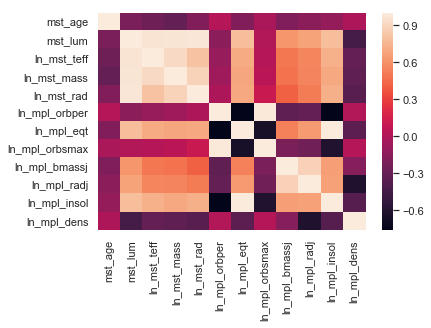

In [14]:
ax = sns.heatmap(exoplanet_core.corr())

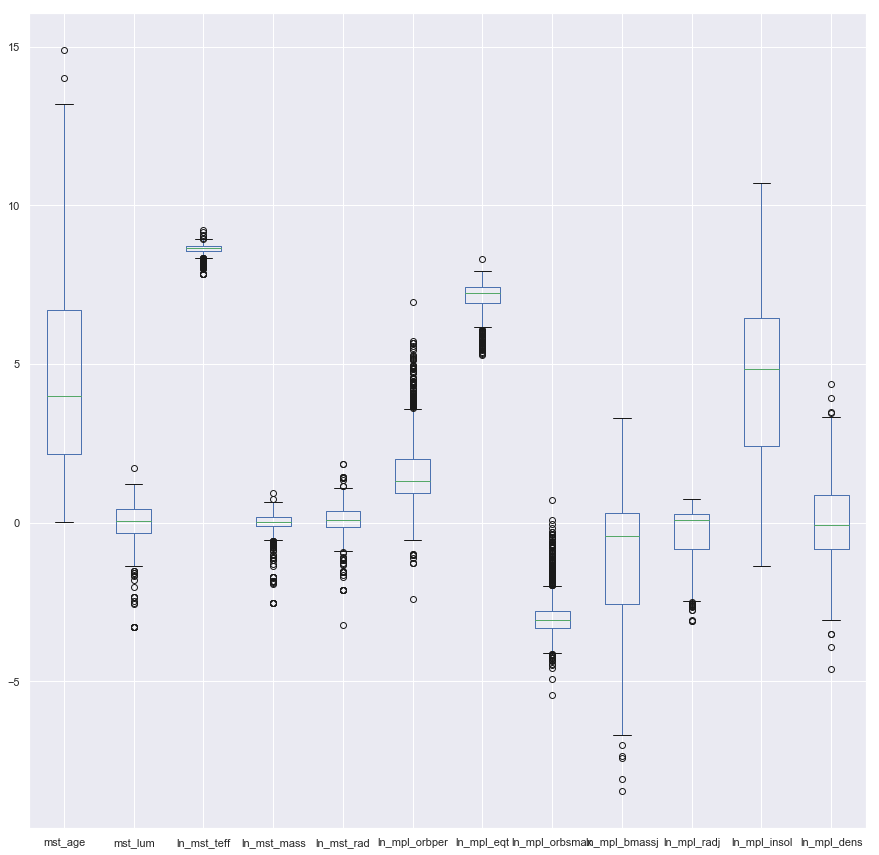

In [15]:
ax = exoplanet_core.boxplot(figsize=(15,15))


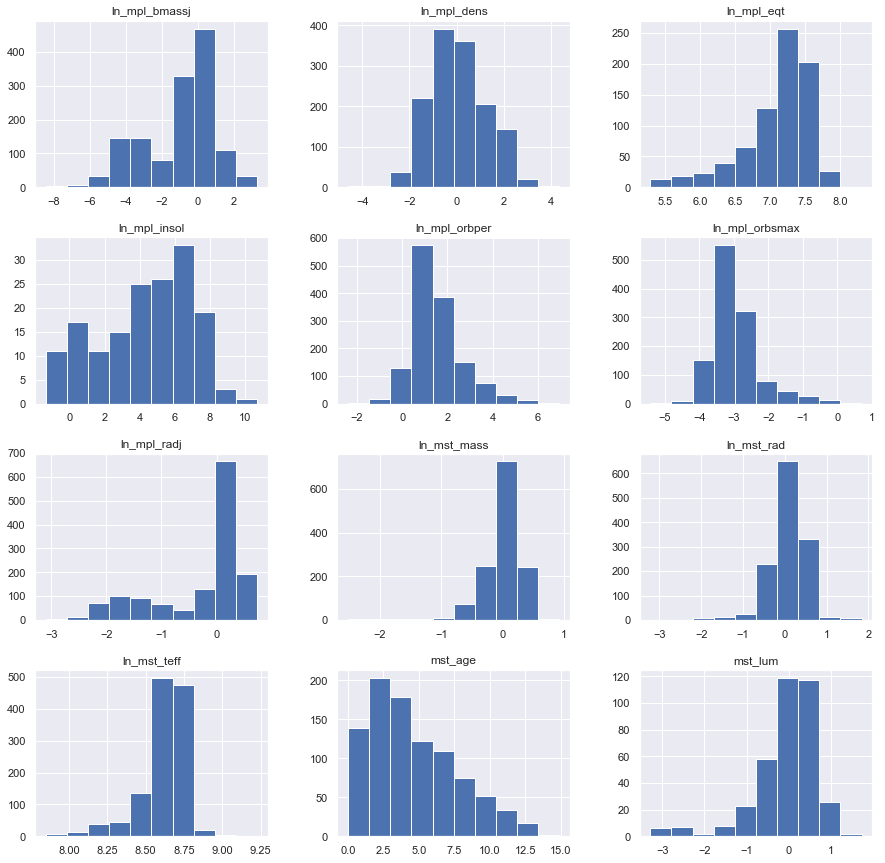

In [16]:
ax = exoplanet_core.hist(figsize=(15,15))

In [37]:
exoplanet_core.info()
short = exoplanet_core.drop(['mst_lum','ln_mpl_insol','ln_mpl_eqt'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 503 to 13101
Data columns (total 12 columns):
mst_age           930 non-null float64
mst_lum           368 non-null float64
ln_mst_teff       1235 non-null float64
ln_mst_mass       1324 non-null float64
ln_mst_rad        1281 non-null float64
ln_mpl_orbper     1375 non-null float64
ln_mpl_eqt        777 non-null float64
ln_mpl_orbsmax    1195 non-null float64
ln_mpl_bmassj     1358 non-null float64
ln_mpl_radj       1377 non-null float64
ln_mpl_insol      161 non-null float64
ln_mpl_dens       1390 non-null float64
dtypes: float64(12)
memory usage: 181.2 KB


In [97]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

short_all = StandardScaler().fit_transform(short.dropna())

db = DBSCAN(eps=0.6, min_samples=4).fit(short.dropna())

In [98]:
from collections import Counter
Counter(list(db.labels_))

Counter({0: 271,
         1: 19,
         -1: 436,
         2: 11,
         3: 5,
         19: 5,
         4: 5,
         5: 10,
         6: 4,
         7: 4,
         8: 10,
         9: 4,
         10: 5,
         11: 3,
         12: 4,
         13: 5,
         14: 5,
         18: 4,
         15: 6,
         16: 6,
         17: 4})

In [100]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(preference=-50).fit(short.dropna())

In [103]:
Counter(ap.labels_)

Counter({1: 76,
         8: 80,
         18: 17,
         17: 77,
         3: 52,
         22: 78,
         0: 10,
         19: 60,
         20: 21,
         2: 22,
         4: 44,
         16: 12,
         15: 44,
         21: 28,
         9: 53,
         7: 23,
         10: 19,
         12: 20,
         6: 28,
         11: 29,
         13: 16,
         5: 14,
         14: 3})

AttributeError: 'AffinityPropagation' object has no attribute 'to_s'